In [1]:
import numpy as np
import pandas as pd


from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
%config IPCompleter.greedy=True # ускоряет автокомплит
plt.rcParams['figure.figsize'] = [10, 5] # задает размер графиков
plt.rcParams['figure.dpi'] = 200 # устанавливает разрешение (при экспорте можно увеличить)

# ToDo list
<label></label>
<ul>
<!--     <li> Note 1 </li>
    <li> Note 2 </li> -->
    <input type="checkbox"> Сделать столбцы для ТВП в млн.м3/сут и для ТВПС в млрд.м3/год для построения графиков и внести в предобработку<br>
</ul>

In [2]:
df = pd.read_csv('./Passports_data.csv', sep='\t', encoding='utf-8',index_col='Unnamed: 0')
df['date_time'] = pd.to_datetime(df['time'])

df = df.drop(['time'], axis=1)
df = df.sort_values(by=['date_time'])

In [3]:
df.columns

Index(['sheet_name', 'line_id', 'line_name', 'fact_day_month', 'tvps_with_rr',
       'tvps_without_rr', 'tvp_with_rr', 'tvp_without_rr', 'fact_month_sum',
       'date_time'],
      dtype='object')

D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


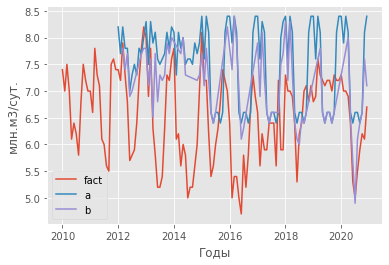

In [4]:
date = df.sort_values(by=['date_time']).loc[df['line_name']=='КС Пуровская – КС Правохеттинская: Вход КС Пуровская']
sns.lineplot(data=date, x='date_time', y='fact_month_sum', label='fact');
sns.lineplot(data=date, x='date_time', y='tvp_without_rr', label='a');
sns.lineplot(data=date, x='date_time', y='tvp_with_rr', label='b', ls='--');
plt.xlabel('Годы');
plt.ylabel('млн.м3/сут.');

In [5]:
# Собрать годовые значения фактического потока

year_fact = pd.pivot_table(df, 
                          index=['line_id', 'line_name'], 
                          columns=df.date_time.dt.year, 
                          values='fact_month_sum',
                          aggfunc=np.sum)

idx = year_fact.index
idx.set_names('РТП ID', level=0, inplace=True)
idx.set_names('Название участка', level=1, inplace=True)
year_fact.columns.set_names('Годы:', inplace=True)
year_fact.to_excel('Year_fact.xlsx')
year_fact

Годы:                                                       2010   2011  \
РТП ID Название участка                                                   
1      КС Ямбургская – КС Правохеттинская: Вход КС Пра...  162.2  168.8   
       КС Ямбургская – КС Правохеттинская: Вход КС Ямб...  121.7  119.9   
2      КС Пуровская – КС Правохеттинская: Вход КС Прав...   81.6   80.9   
       КС Пуровская – КС Правохеттинская: Вход КС Пуро...   81.9   81.5   
3      КС Правохеттинская – КС Сосновская: Вход КС Пра...  304.5  313.9   
...                                                          ...    ...   
106    Чаяндинское НГКМ - Амурский ГПЗ: Выход Чаяндинс...    0.0    0.0   
107    Амурский ГПЗ - Граница КНР: 1983 км МГ "Сила Си...    0.0    0.0   
       Амурский ГПЗ - Граница КНР: Гос. граница КНР          0.0    0.0   
108    Гос. граница РФ – Калининградское ПХГ: Вход Кал...    0.0    0.0   
       Гос. граница РФ – Калининградское ПХГ: Гос. гра...    0.0    0.0   

Годы:                                                       2012   2013  \
РТП ID Название участка                                                   
1      КС Ямбургская – КС Правохеттинская: Вход КС Пра...  163.3  155.0   
       КС Ямбургская – КС Правохеттинская: Вход КС Ямб...  116.1  111.4   
2      КС Пуровская – КС Правохеттинская: Вход КС Прав...   82.7   83.0   
       КС Пуровская – КС Правохеттинская: Вход КС Пуро...   83.6   79.0   
3      КС Правохеттинская – КС Сосновская: Вход КС Пра...  302.1  293.6   
...                                                          ...    ...   
106    Чаяндинское НГКМ - Амурский ГПЗ: Выход Чаяндинс...    0.0    0.0   
107    Амурский ГПЗ - Граница КНР: 1983 км МГ "Сила Си...    0.0    0.0   
       Амурский ГПЗ - Граница КНР: Гос. граница КНР          0.0    0.0   
108    Гос. граница РФ – Калининградское ПХГ: Вход Кал...    0.0    0.0   
       Гос. граница РФ – Калининградское ПХГ: Гос. гра...    0.0    0.0   

Годы:                                                       2014   2015  \
РТП ID Название участка                                                   
1      КС Ямбургская – КС Правохеттинская: Вход КС Пра...  141.9  142.2   
       КС Ямбургская – КС Правохеттинская: Вход КС Ямб...  107.4  108.6   
2      КС Пуровская – КС Правохеттинская: Вход КС Прав...   76.9   79.9   
       КС Пуровская – КС Правохеттинская: Вход КС Пуро...   71.5   80.4   
3      КС Правохеттинская – КС Сосновская: Вход КС Пра...  256.8  246.7   
...                                                          ...    ...   
106    Чаяндинское НГКМ - Амурский ГПЗ: Выход Чаяндинс...    0.0    0.0   
107    Амурский ГПЗ - Граница КНР: 1983 км МГ "Сила Си...    0.0    0.0   
       Амурский ГПЗ - Граница КНР: Гос. граница КНР          0.0    0.0   
108    Гос. граница РФ – Калининградское ПХГ: Вход Кал...    0.0    0.0   
       Гос. граница РФ – Калининградское ПХГ: Гос. гра...    0.0    0.0   

Годы:                                                       2016   2017  \
РТП ID Название участка                                                   
1      КС Ямбургская – КС Правохеттинская: Вход КС Пра...  135.2  145.5   
       КС Ямбургская – КС Правохеттинская: Вход КС Ямб...  102.0  100.0   
2      КС Пуровская – КС Правохеттинская: Вход КС Прав...   69.5   73.7   
       КС Пуровская – КС Правохеттинская: Вход КС Пуро...   69.6   74.0   
3      КС Правохеттинская – КС Сосновская: Вход КС Пра...  246.5  275.3   
...                                                          ...    ...   
106    Чаяндинское НГКМ - Амурский ГПЗ: Выход Чаяндинс...    0.0    0.0   
107    Амурский ГПЗ - Граница КНР: 1983 км МГ "Сила Си...    0.0    0.0   
       Амурский ГПЗ - Граница КНР: Гос. граница КНР          0.0    0.0   
108    Гос. граница РФ – Калининградское ПХГ: Вход Кал...    0.0    0.0   
       Гос. граница РФ – Калининградское ПХГ: Гос. гра...    0.0    0.0   

Годы:                                                       2018   2019   2020  
РТП ID Название

In [6]:
# Собрать годовые значения ТВП c рем работами

year_tvp_with_rr = pd.pivot_table(df, 
                          index=['line_id', 'line_name'], 
                          columns=df.date_time.dt.year, 
                          values='tvp_with_rr',
                          fill_value=0,
                          aggfunc=np.sum)

idx = year_tvp_with_rr.index
idx.set_names('РТП ID', level=0, inplace=True)
idx.set_names('Название участка', level=1, inplace=True)
year_tvp_with_rr.columns.set_names('Годы:', inplace=True)
year_tvp_with_rr.to_excel('year_tvp_with_rr.xlsx')
year_tvp_with_rr

Годы:                                                      2010  2011   2012  \
РТП ID Название участка                                                        
1      КС Ямбургская – КС Правохеттинская: Вход КС Пра...     0     0  132.4   
       КС Ямбургская – КС Правохеттинская: Вход КС Ямб...     0     0   99.5   
2      КС Пуровская – КС Правохеттинская: Вход КС Прав...     0     0   52.8   
       КС Пуровская – КС Правохеттинская: Вход КС Пуро...     0     0   52.3   
3      КС Правохеттинская – КС Сосновская: Вход КС Пра...     0     0  323.4   
...                                                         ...   ...    ...   
106    Чаяндинское НГКМ - Амурский ГПЗ: Выход Чаяндинс...     0     0    0.0   
107    Амурский ГПЗ - Граница КНР: 1983 км МГ "Сила Си...     0     0    0.0   
       Амурский ГПЗ - Граница КНР: Гос. граница КНР           0     0    0.0   
108    Гос. граница РФ – Калининградское ПХГ: Вход Кал...     0     0    0.0   
       Гос. граница РФ – Калининградское ПХГ: Гос. гра...     0     0    0.0   

Годы:                                                       2013   2014  \
РТП ID Название участка                                                   
1      КС Ямбургская – КС Правохеттинская: Вход КС Пра...  117.0  141.3   
       КС Ямбургская – КС Правохеттинская: Вход КС Ямб...   94.6  117.3   
2      КС Пуровская – КС Правохеттинская: Вход КС Прав...   92.3   39.3   
       КС Пуровская – КС Правохеттинская: Вход КС Пуро...   88.9   37.5   
3      КС Правохеттинская – КС Сосновская: Вход КС Пра...  353.7  323.7   
...                                                          ...    ...   
106    Чаяндинское НГКМ - Амурский ГПЗ: Выход Чаяндинс...    0.0    0.0   
107    Амурский ГПЗ - Граница КНР: 1983 км МГ "Сила Си...    0.0    0.0   
       Амурский ГПЗ - Граница КНР: Гос. граница КНР          0.0    0.0   
108    Гос. граница РФ – Калининградское ПХГ: Вход Кал...    0.0    0.0   
       Гос. граница РФ – Калининградское ПХГ: Гос. гра...    0.0    0.0   

Годы:                                                       2015   2016  \
РТП ID Название участка                                                   
1      КС Ямбургская – КС Правохеттинская: Вход КС Пра...   15.0  123.4   
       КС Ямбургская – КС Правохеттинская: Вход КС Ямб...   11.8  101.0   
2      КС Пуровская – КС Правохеттинская: Вход КС Прав...   57.1   35.9   
       КС Пуровская – КС Правохеттинская: Вход КС Пуро...   57.6   36.1   
3      КС Правохеттинская – КС Сосновская: Вход КС Пра...  113.2  307.5   
...                                                          ...    ...   
106    Чаяндинское НГКМ - Амурский ГПЗ: Выход Чаяндинс...    0.0    0.0   
107    Амурский ГПЗ - Граница КНР: 1983 км МГ "Сила Си...    0.0    0.0   
       Амурский ГПЗ - Граница КНР: Гос. граница КНР          0.0    0.0   
108    Гос. граница РФ – Калининградское ПХГ: Вход Кал...    0.0    0.0   
       Гос. граница РФ – Калининградское ПХГ: Гос. гра...    0.0    0.0   

Годы:                                                       2017   2018  \
РТП ID Название участка                                                   
1      КС Ямбургская – КС Правохеттинская: Вход КС Пра...  137.3  139.6   
       КС Ямбургская – КС Правохеттинская: Вход КС Ямб...  104.9  103.1   
2      КС Пуровская – КС Правохеттинская: Вход КС Прав...   77.7   61.5   
       КС Пуровская – КС Правохеттинская: Вход КС Пуро...   78.1   61.8   
3      КС Правохеттинская – КС Сосновская: Вход КС Пра...  340.1  351.2   
...                                                          ...    ...   
106    Чаяндинское НГКМ - Амурский ГПЗ: Выход Чаяндинс...    0.0    0.0   
107    Амурский ГПЗ - Граница КНР: 1983 км МГ "Сила Си...    0.0    0.0   
       Амурский ГПЗ - Граница КНР: Гос. граница КНР          0.0    0.0   
108    Гос. граница РФ – Калининградское ПХГ: Вход Кал...    0.0    0.0   
       Гос. граница РФ – Калининградское ПХГ: Гос. гра...    0.0    0.0   

Годы:                          

In [7]:
# Собрать годовые значения ТВП без рем работ

year_tvp_without_rr = pd.pivot_table(df, 
                          index=['line_id', 'line_name'], 
                          columns=df.date_time.dt.year, 
                          values='tvp_without_rr',
                          fill_value=0,
                          aggfunc=np.sum)

idx = year_tvp_without_rr.index
idx.set_names('РТП ID', level=0, inplace=True)
idx.set_names('Название участка', level=1, inplace=True)
year_tvp_without_rr.columns.set_names('Годы:', inplace=True)
year_tvp_without_rr.to_excel('year_tvp_without_rr.xlsx')
year_tvp_without_rr

Годы:                                                      2010  2011   2012  \
РТП ID Название участка                                                        
1      КС Ямбургская – КС Правохеттинская: Вход КС Пра...     0     0  174.9   
       КС Ямбургская – КС Правохеттинская: Вход КС Ямб...     0     0  132.9   
2      КС Пуровская – КС Правохеттинская: Вход КС Прав...     0     0   92.8   
       КС Пуровская – КС Правохеттинская: Вход КС Пуро...     0     0   92.3   
3      КС Правохеттинская – КС Сосновская: Вход КС Пра...     0     0  360.5   
...                                                         ...   ...    ...   
106    Чаяндинское НГКМ - Амурский ГПЗ: Выход Чаяндинс...     0     0    0.0   
107    Амурский ГПЗ - Граница КНР: 1983 км МГ "Сила Си...     0     0    0.0   
       Амурский ГПЗ - Граница КНР: Гос. граница КНР           0     0    0.0   
108    Гос. граница РФ – Калининградское ПХГ: Вход Кал...     0     0    0.0   
       Гос. граница РФ – Калининградское ПХГ: Гос. гра...     0     0    0.0   

Годы:                                                       2013   2014  \
РТП ID Название участка                                                   
1      КС Ямбургская – КС Правохеттинская: Вход КС Пра...  181.0  172.9   
       КС Ямбургская – КС Правохеттинская: Вход КС Ямб...  142.7  142.8   
2      КС Пуровская – КС Правохеттинская: Вход КС Прав...   97.7   97.0   
       КС Пуровская – КС Правохеттинская: Вход КС Пуро...   94.6   93.0   
3      КС Правохеттинская – КС Сосновская: Вход КС Пра...  363.1  363.5   
...                                                          ...    ...   
106    Чаяндинское НГКМ - Амурский ГПЗ: Выход Чаяндинс...    0.0    0.0   
107    Амурский ГПЗ - Граница КНР: 1983 км МГ "Сила Си...    0.0    0.0   
       Амурский ГПЗ - Граница КНР: Гос. граница КНР          0.0    0.0   
108    Гос. граница РФ – Калининградское ПХГ: Вход Кал...    0.0    0.0   
       Гос. граница РФ – Калининградское ПХГ: Гос. гра...    0.0    0.0   

Годы:                                                       2015   2016  \
РТП ID Название участка                                                   
1      КС Ямбургская – КС Правохеттинская: Вход КС Пра...  170.8  169.9   
       КС Ямбургская – КС Правохеттинская: Вход КС Ямб...  141.6  141.1   
2      КС Пуровская – КС Правохеттинская: Вход КС Прав...   87.8   88.0   
       КС Пуровская – КС Правохеттинская: Вход КС Пуро...   88.2   88.5   
3      КС Правохеттинская – КС Сосновская: Вход КС Пра...  363.9  362.9   
...                                                          ...    ...   
106    Чаяндинское НГКМ - Амурский ГПЗ: Выход Чаяндинс...    0.0    0.0   
107    Амурский ГПЗ - Граница КНР: 1983 км МГ "Сила Си...    0.0    0.0   
       Амурский ГПЗ - Граница КНР: Гос. граница КНР          0.0    0.0   
108    Гос. граница РФ – Калининградское ПХГ: Вход Кал...    0.0    0.0   
       Гос. граница РФ – Калининградское ПХГ: Гос. гра...    0.0    0.0   

Годы:                                                       2017   2018  \
РТП ID Название участка                                                   
1      КС Ямбургская – КС Правохеттинская: Вход КС Пра...  170.7  173.4   
       КС Ямбургская – КС Правохеттинская: Вход КС Ямб...  131.3  129.5   
2      КС Пуровская – КС Правохеттинская: Вход КС Прав...   87.5   87.6   
       КС Пуровская – КС Правохеттинская: Вход КС Пуро...   87.9   88.2   
3      КС Правохеттинская – КС Сосновская: Вход КС Пра...  363.3  365.1   
...                                                          ...    ...   
106    Чаяндинское НГКМ - Амурский ГПЗ: Выход Чаяндинс...    0.0    0.0   
107    Амурский ГПЗ - Граница КНР: 1983 км МГ "Сила Си...    0.0    0.0   
       Амурский ГПЗ - Граница КНР: Гос. граница КНР          0.0    0.0   
108    Гос. граница РФ – Калининградское ПХГ: Вход Кал...    0.0    0.0   
       Гос. граница РФ – Калининградское ПХГ: Гос. гра...    0.0    0.0   

Годы:                          

In [8]:
def get_key(d, value):
    for k, v in d.items():
        if value in v:
            return k
        else: return 'Другая система'

In [9]:
corridors = {'Новый коридор': np.arange(1, 5), 
             'Новый коридор Карпинского направления': [5, 6], 
             'Новый коридор Лялинского напрвления': [7, 8],
             'Старый коридор': np.arange(9, 14),
             'Северный коридор': [15, 86, 16, 17, 90, 91, 92, 93, 94, 95]}

In [10]:
df.columns

Index(['sheet_name', 'line_id', 'line_name', 'fact_day_month', 'tvps_with_rr',
       'tvps_without_rr', 'tvp_with_rr', 'tvp_without_rr', 'fact_month_sum',
       'date_time'],
      dtype='object')

In [11]:
# Собрать все значения для каждого участка
df_min = df.drop(['fact_day_month', 'tvps_with_rr', 'tvps_without_rr'], axis=1)

df_min = df_min.rename({'fact_month_sum': 'Факт', 
                        'tvp_with_rr': 'ТВП с учетом рем работ', 
                        'tvp_without_rr': 'ТВП без учета рем работ'}, axis=1)

df_min = df_min.\
            melt(id_vars=['sheet_name', 'line_id', 'line_name', 
                          'date_time'])[['line_id', 'line_name', 'date_time', 'variable', 'value']]


ts = pd.pivot_table(df_min, 
                          index=['line_id', 'line_name', 'variable'], 
                          columns=df_min.date_time.dt.year, 
                          values='value',
                          fill_value=0,
                          aggfunc=np.sum)

idx = ts.index
idx.set_names('РТП ID', level=0, inplace=True)
idx.set_names('Название участка', level=1, inplace=True)
idx.set_names('Показатель', level=2, inplace=True)
ts.columns.set_names('Годы:', inplace=True)
ts.to_excel('Summary.xlsx')
ts

Годы:                                                                               2010  \
РТП ID Название участка                                   Показатель                       
1      КС Ямбургская – КС Правохеттинская: Вход КС Пра... ТВП без учета рем работ    0.0   
                                                          ТВП с учетом рем работ     0.0   
                                                          Факт                     162.2   
       КС Ямбургская – КС Правохеттинская: Вход КС Ямб... ТВП без учета рем работ    0.0   
                                                          ТВП с учетом рем работ     0.0   
...                                                                                  ...   
108    Гос. граница РФ – Калининградское ПХГ: Вход Кал... ТВП с учетом рем работ     0.0   
                                                          Факт                       0.0   
       Гос. граница РФ – Калининградское ПХГ: Гос. гра... ТВП без учета рем работ    0.0   
                                                          ТВП с учетом рем работ     0.0   
                                                          Факт                       0.0   

Годы:                                                                               2011  \
РТП ID Название участка                                   Показатель                       
1      КС Ямбургская – КС Правохеттинская: Вход КС Пра... ТВП без учета рем работ    0.0   
                                                          ТВП с учетом рем работ     0.0   
                                                          Факт                     168.8   
       КС Ямбургская – КС Правохеттинская: Вход КС Ямб... ТВП без учета рем работ    0.0   
                                                          ТВП с учетом рем работ     0.0   
...                                                                                  ...   
108    Гос. граница РФ – Калининградское ПХГ: Вход Кал... ТВП с учетом рем работ     0.0   
                                                          Факт                       0.0   
       Гос. граница РФ – Калининградское ПХГ: Гос. гра... ТВП без учета рем работ    0.0   
                                                          ТВП с учетом рем работ     0.0   
                                                          Факт                       0.0   

Годы:                                                                               2012  \
РТП ID Название участка                                   Показатель                       
1      КС Ямбургская – КС Правохеттинская: Вход КС Пра... ТВП без учета рем работ  174.9   
                                                          ТВП с учетом рем работ   132.4   
                                                          Факт                     163.3   
       КС Ямбургская – КС Правохеттинская: Вход КС Ямб... ТВП без учета рем работ  132.9   
                                                          ТВП с учетом рем работ    99.5   
...                                                                                  ...   
108    Гос. граница РФ – Калининградское ПХГ: Вход Кал... ТВП с учетом рем работ     0.0   
                                                          Факт                       0.0   
       Гос. граница РФ – Калининградское ПХГ: Гос. гра... ТВП без учета рем работ    0.0   
                                                          ТВП с учетом рем работ     0.0   
                                                          Факт                       0.0   

Годы:                                                                               2013  \
РТП ID Название участка                                   Показатель                       
1      КС Ямбургская – КС Правохеттинская: Вход КС Пра... ТВП без учета рем работ  181.0   
                                                          ТВП с учетом рем работ   117.0   
                                         

## Соберем графики для отдельных участков

In [12]:
line_names = df['line_name'].unique()

In [13]:
df.columns

Index(['sheet_name', 'line_id', 'line_name', 'fact_day_month', 'tvps_with_rr',
       'tvps_without_rr', 'tvp_with_rr', 'tvp_without_rr', 'fact_month_sum',
       'date_time'],
      dtype='object')

In [14]:
df.loc[df['line_id'] == 1]['line_name'].unique()[0]

'КС Ямбургская – КС Правохеттинская: Вход КС Правохеттинская'

In [15]:
df.loc[df['tvp_with_rr'] < df['fact_month_sum']] \
[['line_id', 'line_name', 'tvp_with_rr', 'tvp_without_rr', 'fact_month_sum', 'date_time']]\
.sort_values(by=['line_id'], ascending=True)\
.sort_values(by=['date_time'], ascending=False)

,line_id,line_name,tvp_with_rr,tvp_without_rr,fact_month_sum,date_time
18395,37,КС Грязовец – ГИС Иматра: Справочно: Вход КС Г...,5.9,5.4,6.3,2020-12-01
17375,86,КС Ухта - КС Грязовец: Вход КС Ухта (система 7...,7.2,7.8,7.9,2020-12-01
18455,87,КС Грязовец - ГИС Портовая: Вход КС Грязовец (...,5.9,5.4,6.3,2020-12-01
18491,87,КС Грязовец - ГИС Портовая: Справочно: Вход КС...,7.9,7.9,8.2,2020-12-01
18467,87,"КС Грязовец - ГИС Портовая: Граница ООО ""ГТ Ух...",5.5,5.4,6.1,2020-12-01
...,...,...,...,...,...,...
38016,4,КС Сосновская – КС Таежная: Выход КС Таежная,28.3,29.6,28.5,2012-01-01
38316,11,КС Надым - КС Перегребная: Выход КС Перегребно...,13.9,15.5,14.3,2012-01-01
38472,86,КС Ухта - КС Грязовец: Вход КС Ухта (система 7...,7.3,7.5,7.5,2012-01-01
42168,1,КС Ямбургская – КС Правохеттинская: Вход КС Пр...,15.9,16.2,16.4,2012-01-01


In [16]:
df.loc[(df['line_id'] == 86) & (df['date_time'].dt.year > 2012)] \
[['line_id', 'line_name', 'tvp_with_rr', 'tvp_without_rr', 'fact_month_sum', 'date_time']]


,line_id,line_name,tvp_with_rr,tvp_without_rr,fact_month_sum,date_time
42708,86,КС Ухта - КС Грязовец: Вход КС Ухта (система 1...,1.5,1.5,0.6,2013-01-01
42720,86,КС Ухта - КС Грязовец: Вход КС Грязовец (систе...,1.5,1.5,NaN,2013-01-01
42732,86,КС Ухта - КС Грязовец: Вход КС Грязовец,9.8,10.8,9.7,2013-01-01
42696,86,КС Ухта - КС Грязовец: Вход КС Ухта (система 7...,6.8,7.8,7.4,2013-01-01
42672,86,КС Ухта - КС Грязовец: Вход КС Ухта,10.5,11.6,10.4,2013-01-01
...,...,...,...,...,...,...
17351,86,КС Ухта - КС Грязовец: Вход КС Ухта,14.2,15.2,15.3,2020-12-01
17387,86,КС Ухта - КС Грязовец: Вход КС Ухта (система 1...,5.7,5.7,5.9,2020-12-01
17375,86,КС Ухта - КС Грязовец: Вход КС Ухта (система 7...,7.2,7.8,7.9,2020-12-01
17411,86,КС Ухта - КС Грязовец: Вход КС Грязовец,13.4,14.4,14.6,2020-12-01


In [17]:
df.loc[(df['line_id'] == 86) & (df['date_time'].dt.year > 2012)] \
['line_name'].unique()

array(['КС Ухта - КС Грязовец: Вход КС Ухта (система 101 ата)',
       'КС Ухта - КС Грязовец: Вход КС Грязовец (система 101 ата)',
       'КС Ухта - КС Грязовец: Вход КС Грязовец',
       'КС Ухта - КС Грязовец: Вход КС Ухта (система 76 ата)',
       'КС Ухта - КС Грязовец: Вход КС Ухта',
       'КС Ухта - КС Грязовец: Вход КС Ухта (система 56 ата)'],
      dtype=object)

In [18]:
date = df.loc[(df['line_id'] == 86) & (df['date_time'].dt.year > 2012) & 
              (df['line_name'] == 'КС Ухта - КС Грязовец: Вход КС Ухта (система 76 ата)')] \
[['tvp_with_rr', 'tvp_without_rr', 'fact_month_sum', 'date_time']]
date

,tvp_with_rr,tvp_without_rr,fact_month_sum,date_time
42696,6.8,7.8,7.4,2013-01-01
42697,6.1,7.0,6.7,2013-02-01
42698,6.2,7.7,7.3,2013-03-01
42699,6.5,7.4,6.0,2013-04-01
42700,6.7,7.6,5.5,2013-05-01
...,...,...,...,...
17371,6.1,7.3,5.8,2020-08-01
17372,5.6,7.1,5.7,2020-09-01
17373,5.8,7.6,5.9,2020-10-01
17374,6.8,7.4,7.2,2020-11-01


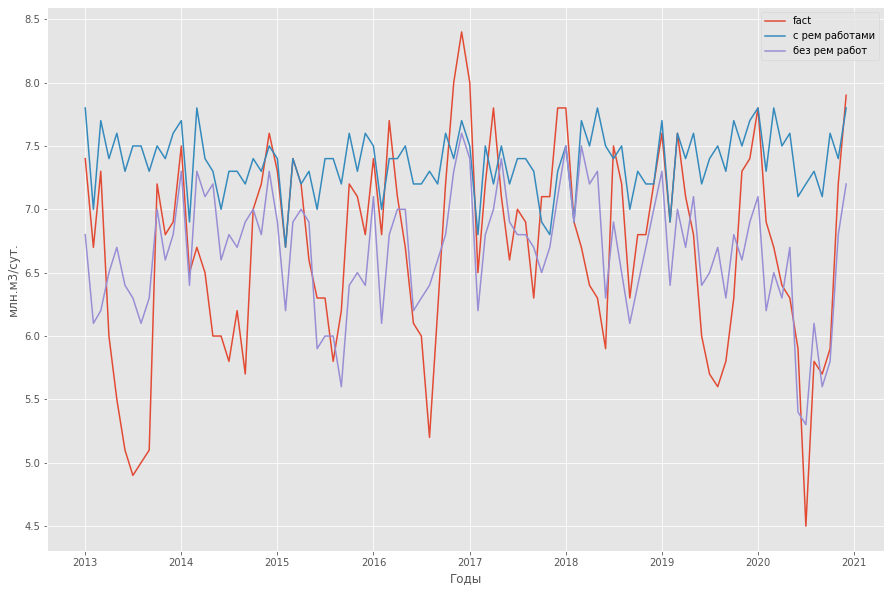

In [39]:
# помесячный график

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(15, 10)

date = df.loc[(df['line_id'] == 86) & (df['date_time'].dt.year > 2012) & 
              (df['line_name'] == 'КС Ухта - КС Грязовец: Вход КС Ухта (система 76 ата)')] \
[['line_id', 'line_name', 'tvp_with_rr', 'tvp_without_rr', 'fact_month_sum', 'date_time']]

sns.lineplot(data=date, x='date_time', y='fact_month_sum', label='fact');
sns.lineplot(data=date, x='date_time', y='tvp_without_rr', label='с рем работами');
sns.lineplot(data=date, x='date_time', y='tvp_with_rr', label='без рем работ', ls='--');
plt.xlabel('Годы');
plt.ylabel('млн.м3/сут.');


In [40]:
date.to_excel('86_months.xlsx')

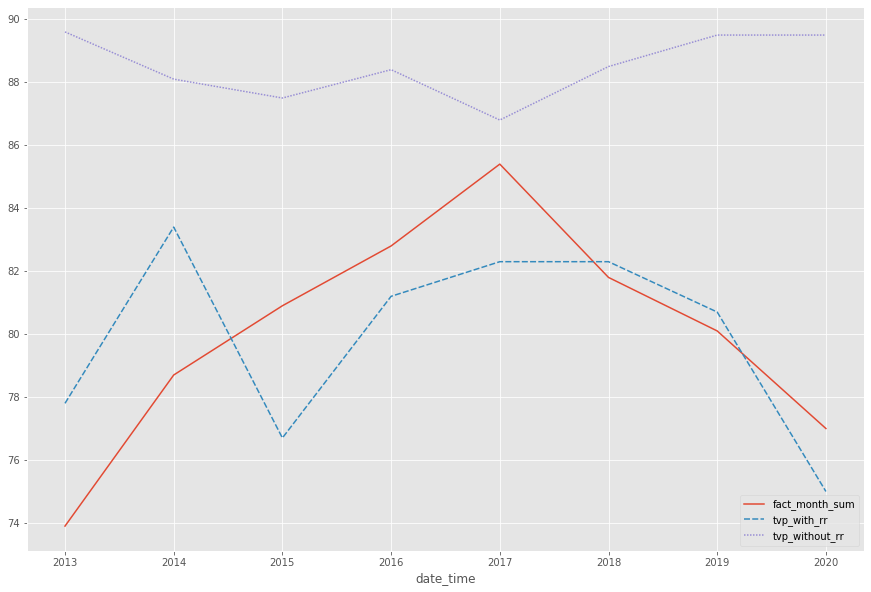

In [34]:
# Годовой график

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(15, 10)

df_min = df.loc[(df['line_id'] == 86) & (df['date_time'].dt.year > 2012) & 
              (df['line_name'] == 'КС Ухта - КС Грязовец: Вход КС Ухта (система 76 ата)')] \
[['line_id', 'line_name', 'tvp_with_rr', 'tvp_without_rr', 'fact_month_sum', 'date_time']]

df_min = df_min.\
            melt(id_vars=['date_time'])[['date_time', 'variable', 'value']]

df_min = df_min.loc[df_min['variable'].isin(['fact_month_sum', 'tvp_with_rr', 'tvp_without_rr'])]


ts = pd.pivot_table(df_min, 
                          index=['variable'], 
                          columns=df_min.date_time.dt.year, 
                          values='value',
                          fill_value=0,
                          aggfunc=np.sum)

ts = ts.T.reset_index().set_index('date_time')

sns.lineplot(data=ts)

In [41]:
ts.to_excel('86_year.xlsx')